# Data load and EDA

### Data load

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load the data set. In order not to exceed my RAM limit, I only loaded some columns, and I selected all the features under the Isolation category.

First of all, I want to explain that I did not choose Conso_ECS_é_primaire as follows:


1. The missing value ratio is very low, about 9.7e-7. Compared with other features, the missing value ratio of this feature is too low.
2. When I was doing data analysis, I found that the correlation between Conso_ECS_é_primaire and several other features is not high, and the introduction of Conso_ECS_é_primaire will have the effect of introducing noise instead. Therefore, I plan to perform separate data imputation on the Conso_ECS_é_primaire feature.


In [ ]:
df_DPE_dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dpe-v2-logements-existants.csv',
                usecols = ['Conso_ECS_é_primaire',
                      'Qualité_isolation_plancher_bas',
                      'Qualité_isolation_murs',
                      'Qualité_isolation_menuiseries',
                      'Qualité_isolation_plancher_haut_toit_terrase',
                      'Conso_5_usages_é_primaire',
                      'Conso_ECS_é_finale',
                      'Type_énergie_principale_ECS',
                      'Conso_é_finale_générateur_ECS_n°1',
                      'Conso_é_finale_générateur_ECS_n°2',
                      'Isolation_toiture_(0/1)',
                      'Deperditions_planchers_bas',
                      'Qualité_isolation_enveloppe',
                      'Déperditions_murs',
                      'Déperditions_portes',
                      'Deperditions_baies_vitrées',
                      'Deperditions_planchers_hauts',
                      'Qualité_isolation_plancher_haut_comble_aménagé',
                      'Qualité_isolation_plancher_haut_comble_perdu',
                      'Année_construction',
                      'Surface_habitable_immeuble',
                      'Surface_habitable_logement',
                      'Code_postal_(BAN)',
                      ],
                sep = ',')

I used a dictionary to map the column names of interest to their corresponding English names. And added Chinese notes (Chinese is my mother tongue)

In [ ]:
# Column name mapping dictionary
name_dict = {
    'Conso_ECS_é_primaire': 'Primary_ECS_Consumption',    # 初级能源消耗系统（ECS）消耗
    'Qualité_isolation_plancher_bas': 'Quality_insulation_lower_floor', # 低层地板绝缘质量
    'Qualité_isolation_murs': 'Quality_insulation_walls',   # 墙体绝缘质量
    'Qualité_isolation_menuiseries': 'Quality_insulation_carpentry',    # 木工绝缘质量
    'Qualité_isolation_plancher_haut_toit_terrase': 'Quality_insulation_upper_floor_roof_terrace',  # 顶楼地板及屋顶露台绝缘质量
    'Conso_5_usages_é_primaire': 'Primary_5_usages_consumption',    # 初级能源5用途消耗
    'Conso_ECS_é_finale': 'Final_ECS_Consumption',  # 最终能源消耗系统（ECS）消耗
    'Type_énergie_principale_ECS': 'Type_main_energy_ECS',  # 主要能源消耗系统（ECS）类型
    'Conso_é_finale_générateur_ECS_n°1': 'Final_consumption_ECS_generator_no1', # 能源消耗系统（ECS）发电机1最终消耗
    'Conso_é_finale_générateur_ECS_n°2': 'Final_consumption_ECS_generator_no2', # 能源消耗系统（ECS）发电机2最终消耗
    'Isolation_toiture_(0/1)': 'Roof_insulation_(0/1)',     # 屋顶绝缘（0/1）
    'Deperditions_planchers_bas': 'Losses_lower_floors',    # 底层楼板热量损失
    'Qualité_isolation_enveloppe': 'Quality_insulation_envelope',   # 围护结构绝缘质量
    'Déperditions_murs': 'Losses_walls',    # 墙体热量损失
    'Déperditions_portes': 'Losses_doors',  # 门的热量损失
    'Deperditions_baies_vitrées': 'Losses_glazed_bays',     # 玻璃窗户热量损失
    'Deperditions_planchers_hauts': 'Losses_upper_floors',      # 上层楼板热量损失
    'Qualité_isolation_plancher_haut_comble_aménagé': 'Quality_insulation_upper_floor_arranged_attic',  # 整理过的阁楼上层楼板绝缘质量
    'Qualité_isolation_plancher_haut_comble_perdu': 'Quality_insulation_upper_floor_lost_attic',    # 丢失的阁楼上层楼板绝缘质量
    'Année_construction': 'Year_construction',  # 建筑年份
    'Surface_habitable_immeuble': 'Living_area_building',   # 建筑物的居住面积
    'Surface_habitable_logement': 'Living_area_housing',    # 住房的居住面积
    'Code_postal_(BAN)': 'Postal_code_(BAN)',  # 邮政编码（BAN）

}

# 使用rename方法重命名列
df_DPE_dataset.rename(columns = name_dict, inplace = True)

In [ ]:
df_DPE_dataset

,Year_construction,Living_area_building,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption,Primary_ECS_Consumption,Roof_insulation_(0/1),Losses_glazed_bays,Losses_walls,...,Quality_insulation_envelope,Quality_insulation_carpentry,Quality_insulation_walls,Quality_insulation_lower_floor,Quality_insulation_upper_floor_roof_terrace,Quality_insulation_upper_floor_arranged_attic,Quality_insulation_upper_floor_lost_attic,Type_main_energy_ECS,Final_consumption_ECS_generator_no1,Final_consumption_ECS_generator_no2
0,1945.0,220.8,220.8,25000.0,4463.6,41345.2,6600.7,0.0,91.3,191.0,...,insuffisante,bonne,insuffisante,très bonne,NaN,NaN,insuffisante,Gaz naturel,2819.6,NaN
1,1948.0,NaN,70.6,13016.0,4522.1,15403.7,4522.1,NaN,16.1,134.9,...,insuffisante,bonne,insuffisante,très bonne,NaN,NaN,très bonne,Gaz naturel,1.0,NaN
2,1948.0,2200.0,109.0,93100.0,7035.3,63792.5,22815.4,NaN,764.5,5368.1,...,insuffisante,moyenne,insuffisante,moyenne,NaN,NaN,NaN,Électricité,2440.2,NaN
3,1976.0,3292.3,47.5,44800.0,2576.8,8334.7,3633.3,NaN,NaN,NaN,...,insuffisante,moyenne,insuffisante,insuffisante,NaN,NaN,NaN,NaN,NaN,NaN
4,1948.0,NaN,36.4,92330.0,1858.2,8857.1,1858.2,NaN,40.2,27.4,...,insuffisante,insuffisante,insuffisante,très bonne,NaN,NaN,très bonne,Gaz naturel,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277638,2013.0,46.4,46.4,44240.0,2486.1,4365.9,2486.1,1.0,7.9,4.3,...,très bonne,très bonne,insuffisante,très bonne,très bonne,NaN,NaN,Gaz naturel,2486.1,NaN
4277639,1960.0,3870.0,59.0,25000.0,2771.0,18778.5,3907.1,NaN,2362.8,5110.1,...,insuffisante,moyenne,insuffisante,insuffisante,NaN,NaN,NaN,Gaz naturel,181757.6,NaN
4277640,1945.0,NaN,70.0,44530.0,1864.7,36347.2,4288.8,1.0,35.5,92.5,...,insuffisante,insuffisante,insuffisante,moyenne,NaN,NaN,bonne,Électricité,1864.7,NaN
4277641,2014.0,1327.0,49.7,51100.0,1205.3,3842.7,1699.5,NaN,373.2,208.9,...,bonne,très bonne,très bonne,très bonne,NaN,NaN,NaN,Gaz naturel,32182.9,NaN


In [ ]:
# output the data type of different featurers
def print_dtypes(df):
    '''
    Func:
        print the list of data type in dataframe
    Input:
        df : Dataframe
    Output:
        No return

    '''
    for col in df.columns:
        print(f"{col}: {df[col].dtype}")

Observe the data type of features

In [ ]:
print('The type of the features in DPE dataset: \n')
print_dtypes(df_DPE_dataset)

The type of the features in DPE dataset: 

Year_construction: float64
Living_area_building: float64
Living_area_housing: float64
Postal_code_(BAN): float64
Final_ECS_Consumption: float64
Primary_5_usages_consumption: float64
Primary_ECS_Consumption: float64
Roof_insulation_(0/1): float64
Losses_glazed_bays: float64
Losses_walls: float64
Losses_lower_floors: float64
Losses_upper_floors: float64
Losses_doors: float64
Quality_insulation_envelope: object
Quality_insulation_carpentry: object
Quality_insulation_walls: object
Quality_insulation_lower_floor: object
Quality_insulation_upper_floor_roof_terrace: object
Quality_insulation_upper_floor_arranged_attic: object
Quality_insulation_upper_floor_lost_attic: object
Type_main_energy_ECS: object
Final_consumption_ECS_generator_no1: float64
Final_consumption_ECS_generator_no2: float64


In [ ]:
# output the missing ratio of featurers
def check_missing_values(df):
    '''
    Func:
        compute the missing ratio of features
    Input:
        df : Dataframe
    Output:
        feature: dictionary, store the missing ratio of features

    '''
    missing_values = df.isnull().mean()
    missing_features = missing_values[missing_values > 0].index.tolist()
    return {feature: missing_values[feature] for feature in missing_features}

In [ ]:
missing_results = check_missing_values(df_DPE_dataset)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in DPE data: \n')
print(df_missing_results)

The information about missing values in DPE data: 

                                          feature  missing_ratio
0                               Year_construction   3.183333e-01
1                            Living_area_building   6.773812e-01
2                             Living_area_housing   1.102546e-02
3                               Postal_code_(BAN)   5.146526e-03
4                           Final_ECS_Consumption   9.350944e-07
5                    Primary_5_usages_consumption   1.077696e-04
6                         Primary_ECS_Consumption   9.350944e-07
7                           Roof_insulation_(0/1)   3.249902e-01
8                              Losses_glazed_bays   8.814667e-03
9                                    Losses_walls   8.809992e-03
10                            Losses_lower_floors   9.711189e-03
11                            Losses_upper_floors   9.632407e-03
12                                   Losses_doors   9.063870e-03
13                       Quality_insul

### Quality_insulation_lower_floor data

The following are the other features I chose to use for interpolation for the feature Quality_insulation_lower_floor.

In [ ]:
df_insulation_floor = df_DPE_dataset[['Quality_insulation_lower_floor',
                    'Quality_insulation_envelope',
                    'Roof_insulation_(0/1)',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    'Losses_lower_floors',
                    ]]

In [ ]:
df_insulation_floor

,Quality_insulation_lower_floor,Quality_insulation_envelope,Roof_insulation_(0/1),Year_construction,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption,Losses_lower_floors
0,très bonne,insuffisante,0.0,1945.0,220.8,25000.0,4463.6,41345.2,0.0
1,très bonne,insuffisante,NaN,1948.0,70.6,13016.0,4522.1,15403.7,0.0
2,moyenne,insuffisante,NaN,1948.0,109.0,93100.0,7035.3,63792.5,301.8
3,insuffisante,insuffisante,NaN,1976.0,47.5,44800.0,2576.8,8334.7,NaN
4,très bonne,insuffisante,NaN,1948.0,36.4,92330.0,1858.2,8857.1,0.0
...,...,...,...,...,...,...,...,...,...
4277638,très bonne,très bonne,1.0,2013.0,46.4,44240.0,2486.1,4365.9,0.0
4277639,insuffisante,insuffisante,NaN,1960.0,59.0,25000.0,2771.0,18778.5,629.3
4277640,moyenne,insuffisante,1.0,1945.0,70.0,44530.0,1864.7,36347.2,39.9
4277641,très bonne,bonne,NaN,2014.0,49.7,51100.0,1205.3,3842.7,9.6


In [ ]:
print('The type of the features in insulation floor dataset: \n')
print_dtypes(df_insulation_floor)

The type of the features in insulation floor dataset: 

Quality_insulation_lower_floor: object
Quality_insulation_envelope: object
Roof_insulation_(0/1): float64
Year_construction: float64
Living_area_housing: float64
Postal_code_(BAN): float64
Final_ECS_Consumption: float64
Primary_5_usages_consumption: float64
Losses_lower_floors: float64


In [ ]:
missing_results = check_missing_values(df_insulation_floor)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in insulation floor data: \n')
print(df_missing_results)

The information about missing values in insulation floor data: 

                          feature  missing_ratio
0  Quality_insulation_lower_floor   8.547791e-02
1           Roof_insulation_(0/1)   3.249902e-01
2               Year_construction   3.183333e-01
3             Living_area_housing   1.102546e-02
4               Postal_code_(BAN)   5.146526e-03
5           Final_ECS_Consumption   9.350944e-07
6    Primary_5_usages_consumption   1.077696e-04
7             Losses_lower_floors   9.711189e-03


As can be seen from the output above, our target column is indeed 8.5%. Roof_insulation_(0/1) has the highest missing ratio, reaching 32.5%. Therefore, we can set the proportion of the actual value in the training and interpolation process according to the above ratio.

According to the above data, I set the proportion of missing values during training to 30%, which is to simulate the worst case as much as possible. The missing value ratio during imputation is set to 0.1, which can simulate the missing ratio of the target column in the real situation.

The following counts the number of rows with only one, two, and three missing values in the entire data set.

In [ ]:
def count_rows_with_n_nulls(df, n):
    null_counts = df.isnull().sum(axis=1)
    return (null_counts == n).sum()


In [ ]:
missing_row_1 = count_rows_with_n_nulls(df_insulation_floor, 1)
print(missing_row_1)

missing_row_2 = count_rows_with_n_nulls(df_insulation_floor, 2)
print(missing_row_2)

missing_row_3 = count_rows_with_n_nulls(df_insulation_floor, 3)
print(missing_row_3)

2590937
287959
20559


It can be seen from the above statistical results that most of the rows with missing values have only one missing value, a small part contains two, and a very small part contains three.

Manually encode non-numeric data. The reasons why I choose manual encoding instead of one hot encoding here are as follows:


1. The dimensions of the data will increase after one hot encoding, which is not conducive to my subsequent use of AE to interpolate the data
2. The four values of 'insuffisante', 'moyenne', 'bonne', and 'très bonne' in features have a relationship between strength and quantity. Using one-hot encoding causes these strength relationships to be lost.

I chose to encode the above four values as 0, 1, 2, 3 in sequence. This is because I added a softmax layer to the DAE used later, and its output for the four categories is 0, 1, 2, 3.

In [ ]:
mapping = {'insuffisante': 0, 'moyenne': 1, 'bonne': 2, 'très bonne': 3}
df_insulation_floor_encoded = df_insulation_floor.replace(mapping)

Next, the numeric continuous variables are standardized to facilitate neural network processing.

In [ ]:
# Get data without missing values
df_insulation_floor_encoded_no_missing_values = df_insulation_floor_encoded.dropna()

Handle postcode addresses

I found that the postal code of France consists of five digits, and the first two digits are the province. In order to reduce the complexity of the zip code as much as possible, I only keep the first two digits as the province.

But there may be a problem: the development of different cities in the same province is not necessarily balanced. This may make it easy to ignore the difference in housing quality brought about by the economic difference between the same regions according to the division of provinces.

In [ ]:
def process_postal_code(df):
    # Convert the zip code column to a string, and use str.zfill() to complete five digits
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)

    # Create a new column to store the processed zip code
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')

    # Convert the new column to float
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: float(x) if x != 'NaN' else float('nan'))

    return df

In [ ]:
df_insulation_floor_encoded_no_missing_values = process_postal_code(df_insulation_floor_encoded_no_missing_values)

<ipython-input-19-977e4c42af8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)
<ipython-input-19-977e4c42af8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')
<ipython-input-19-977e4c42af8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Below is the function that handles Year_construction, where I divide Year_construction into epochs per decade. This reduces the complexity of Year_construction.

In [ ]:
import math
# Define a function for rounding a year to the nearest 10
def round_to_nearest_decade(year):
    return math.floor(year / 10) * 10

def process_year(df):
    df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)
    return df


In [ ]:
df_insulation_floor_encoded_no_missing_values = process_year(df_insulation_floor_encoded_no_missing_values)

<ipython-input-21-95aec6f7b944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)


In [ ]:
# Normalize numeric data
scaler = StandardScaler()
df_insulation_floor_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    ]] = scaler.fit_transform(df_insulation_floor_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    ]])

<ipython-input-23-2a22be40a562>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insulation_floor_encoded_no_missing_values[[


In [ ]:
df_insulation_floor_encoded_no_missing_values.describe()

,Quality_insulation_lower_floor,Quality_insulation_envelope,Roof_insulation_(0/1),Year_construction,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption,Losses_lower_floors
count,1.378137e+06,1.378137e+06,1.378137e+06,1.378137e+06,1.378137e+06,1.378137e+06,1.378137e+06,1.378137e+06,1.378137e+06
mean,1.684206e+00,1.003329e+00,5.601330e-01,-2.345403e-15,-5.818241e-16,5.212761e+01,7.643762e-16,8.113200e-17,5.712649e-17
std,1.165720e+00,1.137959e+00,4.963710e-01,1.000000e+00,1.000000e+00,2.615913e+01,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.230063e+01,-1.298319e+00,1.000000e+00,-1.543327e+00,-1.249994e+00,-3.685390e-01
25%,1.000000e+00,0.000000e+00,0.000000e+00,-7.056985e-01,-5.130324e-01,3.100000e+01,-3.814454e-01,-6.170256e-01,-3.685390e-01
50%,2.000000e+00,1.000000e+00,1.000000e+00,1.697716e-01,-1.425214e-01,5.600000e+01,-1.295588e-01,-2.386811e-01,-1.271765e-01
75%,3.000000e+00,2.000000e+00,1.000000e+00,7.534183e-01,2.919273e-01,7.500000e+01,1.464973e-01,3.318367e-01,7.930708e-02
max,3.000000e+00,3.000000e+00,1.000000e+00,3.671652e+00,3.798854e+02,9.700000e+01,3.739384e+02,1.023961e+02,6.514813e+01


Let's observe the linear relationship between the data without missing values:

For this data set, outliers need to be removed, otherwise the loss will be equal to NA or Inf during training.

In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

In [ ]:
test_columns = [# 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    # 'Quality_insulation_envelope',
                    ]
df_insulation_floor_encoded_no_missing_values_outliers = remove_outliers(df_insulation_floor_encoded_no_missing_values, test_columns)

In [ ]:
df_insulation_floor_encoded_no_missing_values_outliers.describe()

,Quality_insulation_lower_floor,Quality_insulation_envelope,Roof_insulation_(0/1),Year_construction,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption,Losses_lower_floors
count,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06
mean,1.760968e+00,1.081370e+00,5.750303e-01,7.816294e-02,-1.608570e-01,5.193378e+01,-1.788401e-01,-1.945596e-01,-1.347653e-01
std,1.142579e+00,1.143351e+00,4.943386e-01,8.838895e-01,5.400372e-01,2.588621e+01,3.519908e-01,5.691626e-01,2.200507e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.748462e+00,-1.298319e+00,1.000000e+00,-1.127132e+00,-1.192562e+00,-3.685390e-01
25%,1.000000e+00,0.000000e+00,0.000000e+00,-7.056985e-01,-5.654941e-01,3.100000e+01,-3.928749e-01,-6.417027e-01,-3.685390e-01
50%,2.000000e+00,1.000000e+00,1.000000e+00,1.697716e-01,-2.097380e-01,5.600000e+01,-1.758593e-01,-3.116474e-01,-1.634506e-01
75%,3.000000e+00,2.000000e+00,1.000000e+00,7.534183e-01,1.607730e-01,7.500000e+01,2.441236e-02,1.524390e-01,8.153964e-03
max,3.000000e+00,3.000000e+00,1.000000e+00,1.628888e+00,1.500187e+00,9.700000e+01,8.439174e-01,1.535938e+00,6.345804e-01


Next, scale the continuous variables. Scale it to the (0,1) interval.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_insulation_floor_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    # 'Quality_insulation_envelope',
                    ]] = scaler.fit_transform(df_insulation_floor_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    # 'Quality_insulation_envelope',
                    ]])


The distribution histogram and heat map of each feature after data preprocessing are drawn below, so as to have an intuitive understanding of the data.

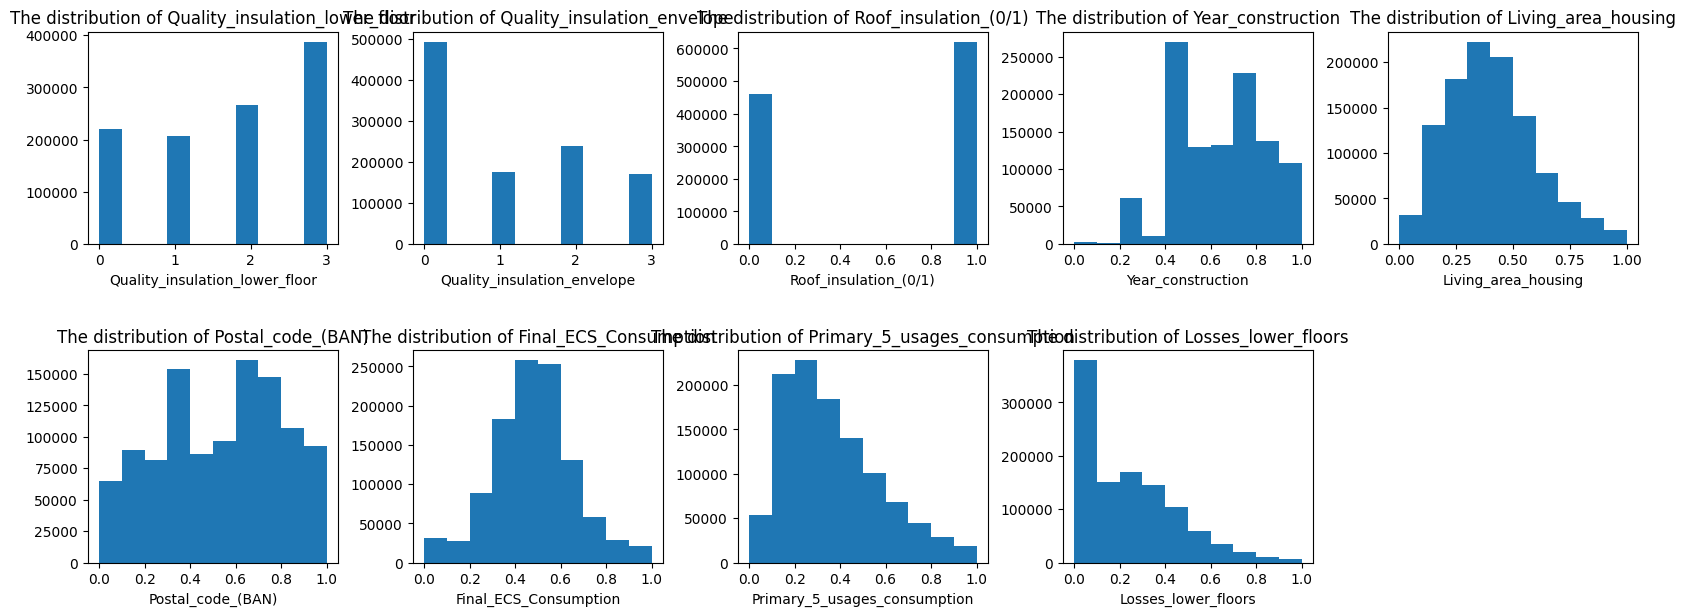

In [ ]:
check_columns = list(df_insulation_floor_encoded_no_missing_values_outliers.columns.values)
# check_class_balance(df_diabetic_data, check_columns)

plt.figure(figsize = (20, 40))
i = 1
column = check_columns

# plot the distributions
for col in column:
    plt.subplot(10, 5, i)
    plt.title('The distribution of {}'.format(col))
    plt.xlabel('{}'.format(col))
    # plt.ylabel('Count')
    plt.hist(df_insulation_floor_encoded_no_missing_values_outliers[col])
    i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

In [ ]:
df_insulation_floor_encoded_no_missing_values_outliers.describe()

,Quality_insulation_lower_floor,Quality_insulation_envelope,Roof_insulation_(0/1),Year_construction,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption,Losses_lower_floors
count,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06,1.079877e+06
mean,1.760968e+00,1.081370e+00,5.750303e-01,6.457388e-01,4.064533e-01,5.305602e-01,4.811101e-01,3.657697e-01,2.330467e-01
std,1.142579e+00,1.143351e+00,4.943386e-01,2.019234e-01,1.929734e-01,2.696480e-01,1.785805e-01,2.085991e-01,2.193664e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,4.666667e-01,2.618629e-01,3.125000e-01,3.725208e-01,2.018909e-01,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.000000e+00,6.666667e-01,3.889865e-01,5.729167e-01,4.826223e-01,3.228568e-01,2.044506e-01
75%,3.000000e+00,2.000000e+00,1.000000e+00,8.000000e-01,5.213825e-01,7.708333e-01,5.842290e-01,4.929453e-01,3.755216e-01
max,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<Axes: title={'center': 'Spearman Correlation of Features'}>

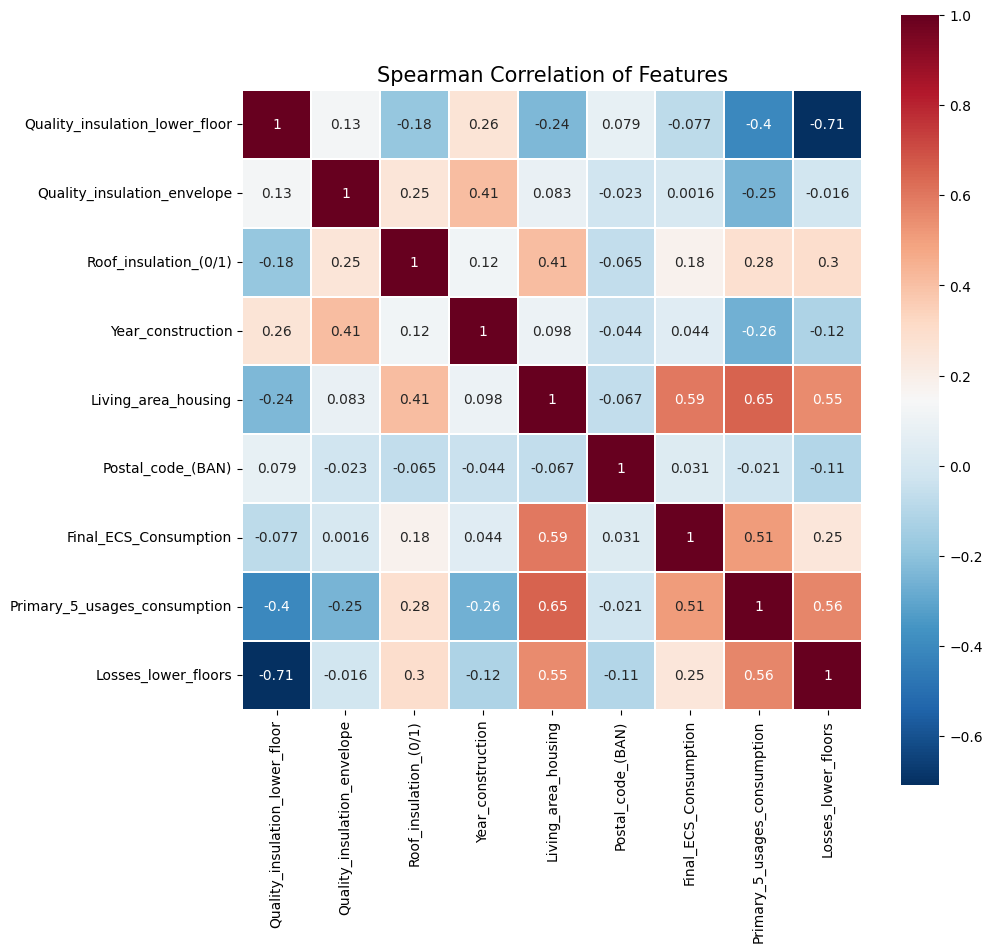

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Spearman Correlation of Features', size = 15)
sns.heatmap(df_insulation_floor_encoded_no_missing_values_outliers.astype(float).corr(method = 'spearman'), linewidths = 0.1, vmax = 1.0, square = True, cmap = 'RdBu_r', linecolor = 'white', annot = True)

### Plot functions

In [ ]:
def count_and_plot_completed_data(completed_data_numpy):
    '''
    Func:
        Count and plot the frequency of each value before imputation
    Input:
        df : Dataframe, no missing values.(Train set)
    Output:
        No Return

    '''
    # Count unique values in numpy array
    values, counts = np.unique(completed_data_numpy, return_counts = True)

    # Calculate frequencies
    frequencies = counts / counts.sum()
    percentages = 100 * frequencies

    # Create bar plot
    plt.figure(figsize = (10, 5))
    bars = plt.bar(values, counts, color = 'blue')

    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title('Count of unique values in completed data')

    # Add percentage on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(percentage, 2), ha = 'center', va = 'bottom')

    plt.show()


In [ ]:
def count_and_plot_missing_data(missing_data_numpy, mask):
    '''
    Func:
        Count and plot the frequency of each value in imputated data.
    Input:
        df : Dataframe, imputated data.
        mask : The position of the missing value in the array.
    Output:
        No Return

    '''
    # Apply mask to numpy array
    masked_data = missing_data_numpy[mask]

    # Count unique values in numpy array
    values, counts = np.unique(masked_data, return_counts=True)

    # Calculate frequencies
    frequencies = counts / counts.sum()
    percentages = 100 * frequencies

    # Create bar plot
    plt.figure(figsize=(10,5))
    bars = plt.bar(values, counts, color='blue')

    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title('Count of unique values in masked numpy array')

    # Add percentage on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(percentage, 2), ha='center', va='bottom')

    plt.show()


In [ ]:
def count_and_plot_missing_data(df, column_name, mask):
    '''
    Func:
        Count and plot the frequency of each value in imputed data.
    Input:
        df : Dataframe, imputed data.
        mask : The position of the missing value in the array.
        column_name : String, the name of the column to be plotted.
    Output:
        No Return

    '''
    # Get the column index
    column_index = df.columns.get_loc(column_name)

    # Apply mask to the specific column in the numpy array
    masked_data = df.values[mask, column_index]

    # Count unique values in numpy array
    values, counts = np.unique(masked_data, return_counts=True)

    # Calculate frequencies
    frequencies = counts / counts.sum()
    percentages = 100 * frequencies

    # Create bar plot
    plt.figure(figsize=(10,5))
    bars = plt.bar(values, counts, color='blue')

    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title(f'Count of unique values in masked numpy array for {column_name}')

    # Add percentage on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(percentage, 2), ha='center', va='bottom')

    plt.show()


# Traditional DAE for floor

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
dae_dataset

,Quality_insulation_lower_floor,Quality_insulation_envelope,Roof_insulation_(0/1),Year_construction,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption,Losses_lower_floors
11,1.0,1,1.0,0.733333,0.615114,0.270833,0.738652,0.675537,0.456189
14,1.0,2,1.0,0.733333,0.258934,0.604167,0.272281,0.290914,0.403338
17,2.0,2,0.0,0.866667,0.281195,0.343750,0.335808,0.174100,0.183588
20,2.0,1,1.0,0.533333,0.612185,0.500000,0.037304,0.208831,0.279555
25,1.0,0,0.0,0.466667,0.568248,0.604167,0.565392,0.432806,0.456189
...,...,...,...,...,...,...,...,...,...
4277629,2.0,3,1.0,0.866667,0.497950,0.854167,0.305300,0.152913,0.418637
4277630,3.0,2,1.0,0.933333,0.560633,0.333333,0.607608,0.333908,0.133519
4277638,3.0,3,1.0,0.933333,0.254247,0.447917,0.707073,0.080797,0.000000
4277640,1.0,0,1.0,0.466667,0.392501,0.447917,0.477562,0.881146,0.554937


In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.2829223871231079
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.22692279517650604
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.22251825034618378
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.2205297350883484
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.21914678812026978
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.2188439667224884
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.21828323602676392
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.21764813363552094
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.2156134843826294
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.21460537612438202
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.21390655636787415
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.21340766549110413
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.2130441665649414
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.21287107467651367
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.21256422996520996
Noise Epoch 1/1, Iterati

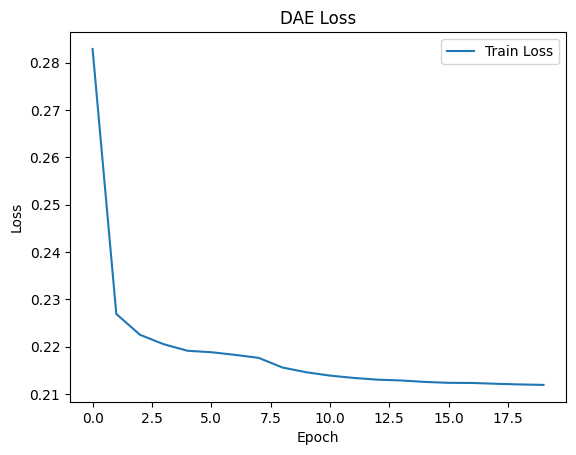

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/dae_result.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.65629977, shape=(), dtype=float32)
Loss: tf.Tensor(0.3249616, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.50567114, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6090455, shape=(), dtype=float32)
Loss: tf.Tensor(0.31253037, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.53730446, shape=(), dtype=float32)


# DE-DAE for floor



In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.22211574018001556
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.18196983635425568
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.1713150441646576
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.1672341674566269
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.1639542579650879
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.16215533018112183
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.1612275242805481
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.1602424681186676
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.15954071283340454
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.1591910868883133
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.15889179706573486
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.15868012607097626
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.15847940742969513
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.15831342339515686
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.15815864503383636
Noise Epoch 1/1, Iteratio

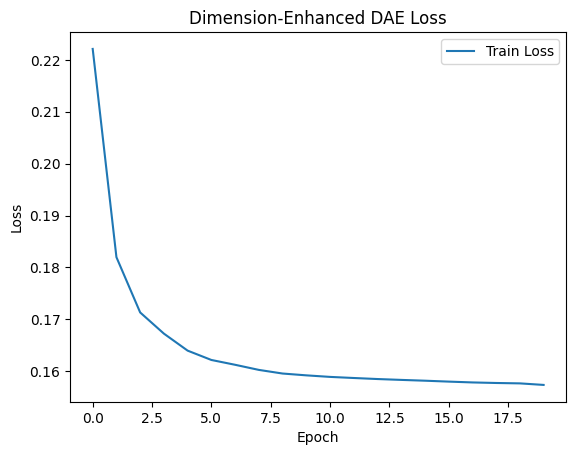

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.58153874, shape=(), dtype=float32)
Loss: tf.Tensor(0.26552594, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5470814, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.5507433, shape=(), dtype=float32)
Loss: tf.Tensor(0.25607243, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.56831795, shape=(), dtype=float32)


# DE-DAE-MD for floor

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  1.0235704183578491
Noise Epoch 1/1, Iteration 2/20
Train loss:  2.165642023086548
Noise Epoch 1/1, Iteration 3/20
Train loss:  2.683579206466675
Noise Epoch 1/1, Iteration 4/20
Train loss:  2.6675119400024414
Noise Epoch 1/1, Iteration 5/20
Train loss:  1.4375076293945312
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.8507830500602722
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.8481425642967224
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.844870924949646
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.8446981906890869
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.841569721698761
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.841194748878479
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.839937150478363
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.8374980688095093
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.8374836444854736
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.8365365862846375
Noise Epoch 1/1, Iteration 16/20
Train l

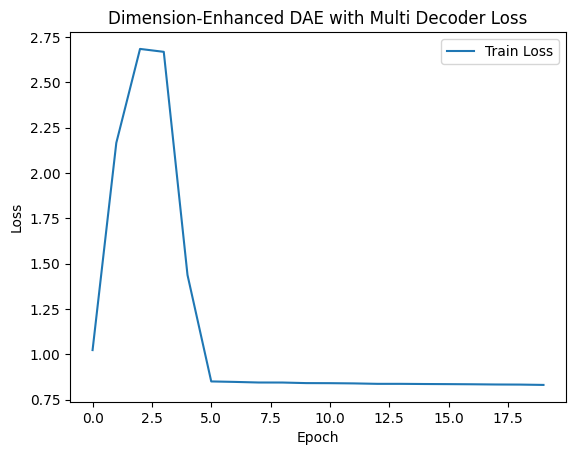

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE with Multi Decoder Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_md_result.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6083152, shape=(), dtype=float32)
Loss: tf.Tensor(0.28178316, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57121754, shape=(), dtype=float32)


<ipython-input-153-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.55666375, shape=(), dtype=float32)
Loss: tf.Tensor(0.27042234, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5952591, shape=(), dtype=float32)


<ipython-input-153-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


# Ensemble Model for floor

In this part, I want to explain that I have tried many DAE structures during these three weeks, including traditional DAEs using fully linked networks and DAEs using CNNs. None of these models had an imputation accuracy of more than 25% for the target column. So the DAE structure I present below is the best structure I have come up with after numerous attempts during these three weeks.

The final performance of the model is comparable to models trained and predicted using a dataset without missing values.

I have made major changes to the last DAE. At present, only the Encoder part is the same as the last DAE, and the idea of dimension increase is still retained. Because I have tried many times, the performance is always better than that after dimension reduction and then restoration. For this DAE, I adopted an integration method to improve the performance of the model, and divided the DAE decoder into different parts according to the data type. The composition of a single DAE is as follows:


1. Encoder, all Decoders share this encoder, and the encoder upgrades the data.
2. Decoder f1, decodes the target column Quality_insulation_lower_floor, and its last layer is a softmax network with 4 nodes.
3. Decoder f2, decodes Quality_insulation_envelope, and its last layer is a softmax network with 4 nodes.
4. Decoder f3, decodes Roof_insulation_(0/1), the last layer of which is a softmax network with 2 nodes.
5. Decoder f4, to decode the remaining continuous variables.


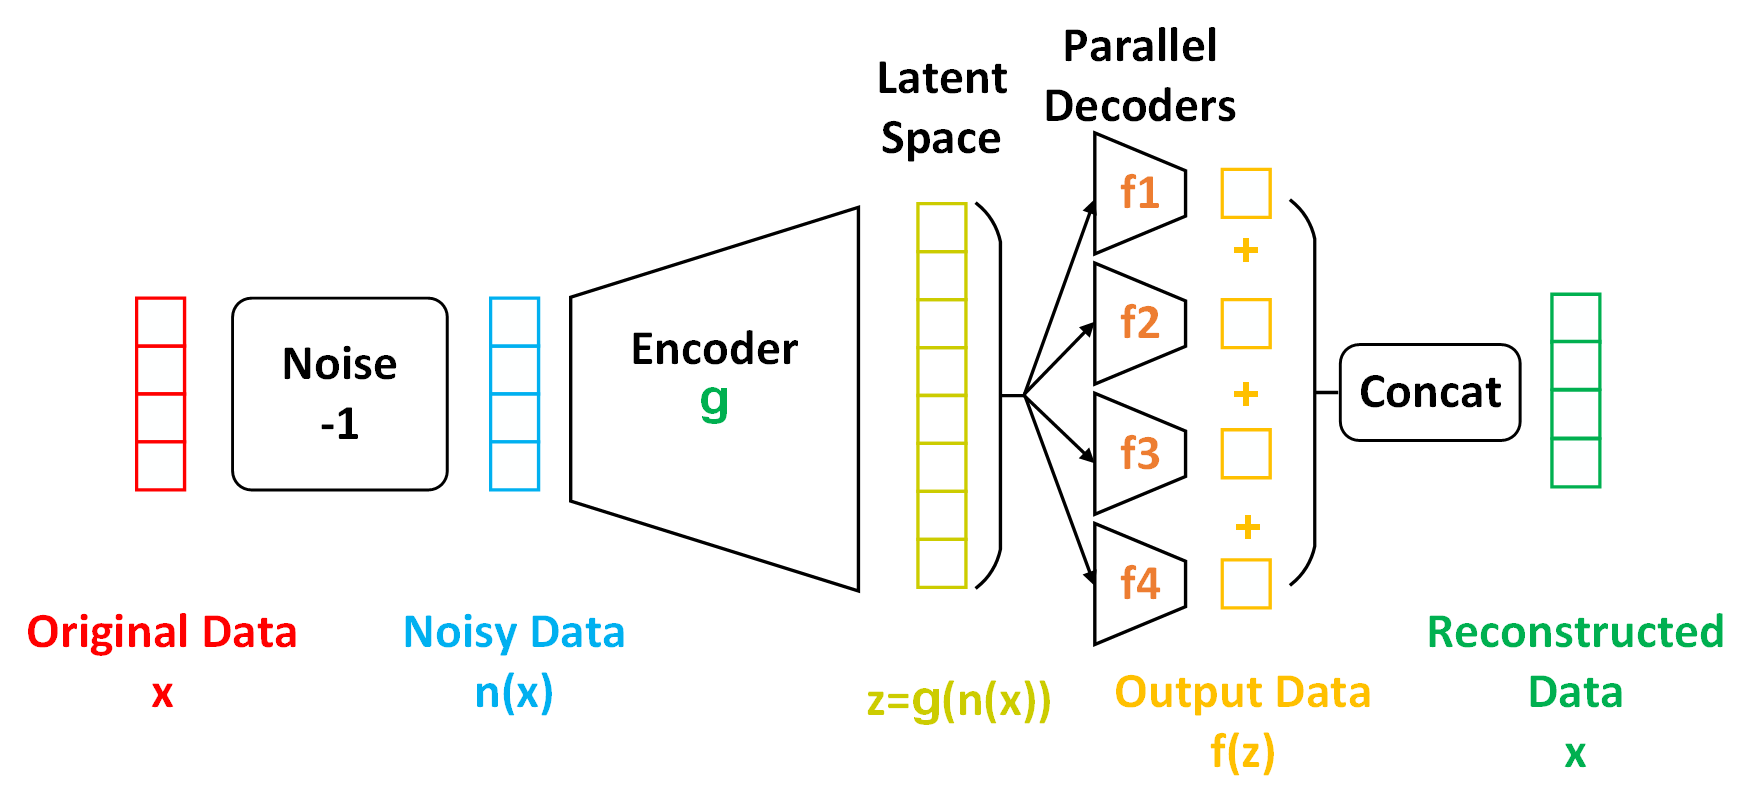




At the same time, in order to improve the performance of my model, I used the above DAE and trained three DAE networks under different activation functions to gain the advantage of the ensemble method. The three DAEs mainly use the activation functions Leaky_ReLU, Swish, and ELU.
The schematic diagram of the integration method is as follows:

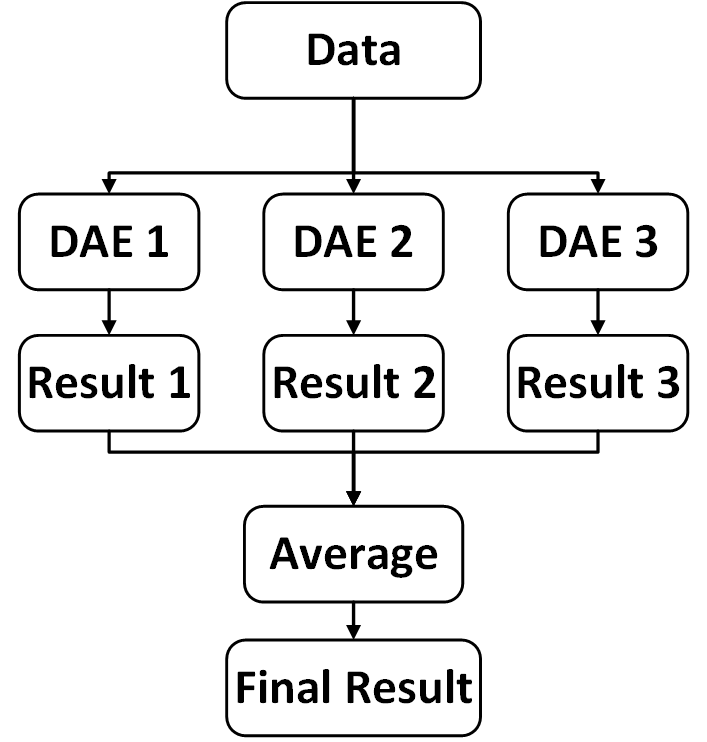

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(4, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(4, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

,Quality_insulation_lower_floor,Quality_insulation_envelope,Roof_insulation_(0/1),Year_construction,Living_area_housing,Postal_code_(BAN),Final_ECS_Consumption,Primary_5_usages_consumption,Losses_lower_floors
count,863901.000000,863901.000000,863901.000000,863901.000000,863901.000000,863901.000000,863901.000000,863901.000000,863901.000000
mean,1.761512,1.081326,0.575030,0.645630,0.406467,0.530602,0.481110,0.365648,0.233128
std,1.142205,1.143455,0.494339,0.202022,0.192926,0.269561,0.178542,0.208470,0.219461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.466667,0.261863,0.312500,0.372595,0.201893,0.000000
50%,2.000000,1.000000,1.000000,0.666667,0.388987,0.572917,0.482622,0.322844,0.204451
75%,3.000000,2.000000,1.000000,0.800000,0.521383,0.770833,0.584081,0.492773,0.375522
max,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(x_train)

863901

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 42s 11ms/step - loss: 1.0629
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 36s 11ms/step - loss: 0.8964
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8741
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8549
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 35s 10ms/step - loss: 0.8424
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 35s 10ms/step - loss: 0.8349
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8278
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 36s 11ms/step - loss: 0.8245
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 35s 11ms/step - loss: 0.8210
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 45s 11ms/step - loss: 1.0496
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8911
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.4594
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 40s 12ms/step - loss: 0.8640
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8603
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8545
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8534
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8507
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8492
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 45s 12ms/step - loss: 0.9850
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 40s 12ms/step - loss: 0.8831
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.8661
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8397
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.8276
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 40s 12ms/step - loss: 0.8215
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.8134
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.8004
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.7927
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')

I added a Classifier constructed using MLP below. This classifier is trained on data without missing values and predicts the target column using data without missing values.

The purpose of my doing this is to use this classifier as a baseline model to judge the imputation performance of my DAE. If DAE can approach or reach the performance of MLP using the full data set for prediction, then the DAE model I constructed is meaningful.

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
26997/26997 [==============================] - 64s 2ms/step - loss: 0.8670 - accuracy: 0.5894 - val_loss: 0.8382 - val_accuracy: 0.6020
Epoch 2/10
26997/26997 [==============================] - 64s 2ms/step - loss: 0.8249 - accuracy: 0.6097 - val_loss: 0.8161 - val_accuracy: 0.6109
Epoch 3/10
26997/26997 [==============================] - 65s 2ms/step - loss: 0.8066 - accuracy: 0.6177 - val_loss: 0.8021 - val_accuracy: 0.6187
Epoch 4/10
26997/26997 [==============================] - 66s 2ms/step - loss: 0.7946 - accuracy: 0.6226 - val_loss: 0.7908 - val_accuracy: 0.6262
Epoch 5/10
26997/26997 [==============================] - 71s 3ms/step - loss: 0.7876 - accuracy: 0.6245 - val_loss: 0.7880 - val_accuracy: 0.6216
Epoch 6/10
26997/26997 [==============================] - 68s 3ms/step - loss: 0.7840 - accuracy: 0.6252 - val_loss: 0.7987 - val_accuracy: 0.6173
Epoch 7/10
26997/26997 [==============================] - 71s 3ms/step - loss: 0.7817 - accuracy: 0.6262 - val_loss: 0

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


The following is my imputation performance results. I have listed the table to calculate the performance of the model. You can directly look at the table to observe the results.

In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_lower_floor'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6049727, shape=(), dtype=float32)
Loss: tf.Tensor(0.27291393, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.58952016, shape=(), dtype=float32)


<ipython-input-253-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.5988577, shape=(), dtype=float32)
Loss: tf.Tensor(0.2737684, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5712904, shape=(), dtype=float32)


<ipython-input-253-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5686864, shape=(), dtype=float32)
Loss: tf.Tensor(0.26152965, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6015495, shape=(), dtype=float32)


<ipython-input-253-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5241467, shape=(), dtype=float32)
Loss: tf.Tensor(0.249835, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.62795025, shape=(), dtype=float32)


<ipython-input-253-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.578025, shape=(), dtype=float32)
Loss: tf.Tensor(0.26203886, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5991742, shape=(), dtype=float32)


<ipython-input-254-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.52976793, shape=(), dtype=float32)
Loss: tf.Tensor(0.25246388, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6254969, shape=(), dtype=float32)


<ipython-input-254-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


By analyzing the above results, we can see that DAE3 and ensemble are the best

In the case of a missing rate of 20%, the performance of each model is as follows:

| metrics |DAE1|DAE2|DAE3|Ensemble|
|----|----|----|----|--------|
|target col loss|0.598|0.591|0.558|0.562|
|total loss|0.279|0.350|0.339|0.303|
|target col acc|0.584|0.589|0.613|0.611|


Since DAE3 and ensemble performed best, we tested the imputation accuracy at a missing rate of 10% (note that the missing rate of 10% is very close to the missing rate of the real dataset, and the missing rate of the target column in the real dataset 8.5%)

| metrics |DAE3|Ensemble|
|----|-----|--------|
|target col loss|0.512|0.504|
|total loss|0.328|0.287|
|target col acc|0.638|0.642|

As can be seen from the above experimental results, the best model is ensemble. When the missing rate is 10%, it exceeds DAE3 in three different metrics.

At the same time, compared with the MLP classification network trained without missing values: the correct rate of the ensemble method is 0.6424, while the correct rate of the MLP classifier is 0.6342.

It should be noted that this MLP classifier is only trained for 10 rounds in the report, while DAE is trained for 50 rounds. However, when I tested the MLP alone, after the number of training rounds reached 50 rounds, the correct rate could not exceed 0.65.

Note that this MLP is trained without missing values and predicts target col using data without missing values. The DAE and ensemble methods used in the experiment can already achieve or even slightly exceed the effect of MLP. I think this result has some value.

In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_lower_floor')], 'Quality_insulation_lower_floor']

192300     3.0
3615450    3.0
3887846    2.0
3531871    3.0
1605559    0.0
          ... 
1025368    0.0
2992036    0.0
1004793    3.0
1817177    3.0
4150430    3.0
Name: Quality_insulation_lower_floor, Length: 43035, dtype: float64

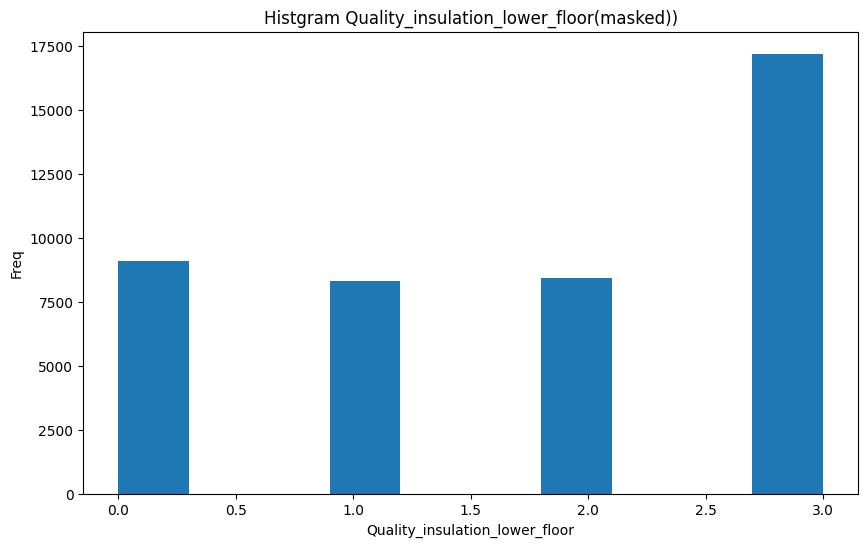

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)